In [120]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Possum dataset

In [89]:
df = pd.read_csv('./datasets/possum.csv')

In [90]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [91]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [92]:
df.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


In [93]:
df.corr() > 0.9

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,True,True,False,False,False,False,False,False,False,False,False,False
site,True,True,False,False,False,False,False,False,False,False,False,False
age,False,False,True,False,False,False,False,False,False,False,False,False
hdlngth,False,False,False,True,False,False,False,False,False,False,False,False
skullw,False,False,False,False,True,False,False,False,False,False,False,False
totlngth,False,False,False,False,False,True,False,False,False,False,False,False
taill,False,False,False,False,False,False,True,False,False,False,False,False
footlgth,False,False,False,False,False,False,False,True,False,False,False,False
earconch,False,False,False,False,False,False,False,False,True,False,False,False
eye,False,False,False,False,False,False,False,False,False,True,False,False


In [94]:
df.nunique()

case        104
site          7
Pop           2
sex           2
age           9
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

In [95]:
df = df.drop('case', axis=1)

In [96]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [97]:
df.corr()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716
chest,-0.345494,0.334209,0.631498,0.629737,0.577890,0.174997,0.450590,0.199230,0.149338,1.000000,0.606170


### Cisenje podataka

In [98]:
df.isna().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [99]:
mean_age = df.loc[:, 'age'].mean()
df.loc[df.age.isna(), 'age'] = mean_age

In [100]:
mean_footlgth = df.loc[:, 'footlgth'].mean()
df.loc[df.footlgth.isna(), 'footlgth'] = mean_footlgth

In [101]:
df.isna().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

### Enkodiranje znacajki

In [102]:
le = LabelEncoder()
le.fit(df.loc[:,'sex'])
df.loc[:,'sex'] = le.transform(df.loc[:,'sex'])

In [103]:
le = LabelEncoder()
le.fit(df.loc[:,'Pop'])
df.loc[:,'Pop'] = le.transform(df.loc[:,'Pop'])

In [104]:
le = LabelEncoder()
le.fit(df.loc[:,'site'])
df.loc[:,'site'] = le.transform(df.loc[:,'site'])

In [105]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,6,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,6,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,6,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,6,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


### Z score

In [106]:
df.iloc[:, 3:] = (df.iloc[:, 3:] - df.iloc[:, 3:].mean()) / df.iloc[:, 3:].std()

In [59]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,0,1,2.182364,0.418967,1.129414,0.443456,-0.515236,1.374370,1.549925,0.146468,0.488855,1.235889
1,0,0,0,1.134829,-0.028792,0.230083,1.023428,-0.260072,0.919339,0.746884,0.908101,0.733282,0.149699
2,0,0,0,1.134829,0.390982,1.000938,1.951384,1.015752,1.579134,0.917226,0.432080,1.466565,0.511762
3,0,0,0,1.134829,0.167102,0.069488,1.139423,0.505422,1.738395,0.990230,0.146468,0.488855,0.511762
4,0,0,0,-0.960240,-0.308642,-0.187464,-0.368506,-0.515236,0.578066,1.233576,0.051264,0.733282,0.149699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,6,1,1,-1.484008,-0.868341,-0.283820,-1.296462,-0.260072,-0.559511,-0.323837,-0.234349,-1.955420,-2.022680
100,6,1,1,-1.484008,-1.120205,-0.701367,-1.064473,1.015752,-0.923536,-0.031822,-0.995982,-0.977710,0.149699
101,6,1,0,1.134829,-0.056777,-0.605010,0.443456,0.505422,-1.128300,-0.664521,-1.948024,-0.977710,-0.936490
102,6,1,1,0.087295,-0.308642,-0.540772,-1.064473,-0.260072,-1.264809,-0.542848,0.336876,-0.977710,-1.298554


### K-Means

In [73]:
# eye, chest, belly

for k in range(1, 5+1):
    kmean = KMeans(n_clusters=k, random_state=42).fit(df)
    print(kmean.labels_)
    labels = kmean.labels_
    plt.scatter(df.eye)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 0 0 0 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 0 2 2 2 2 2 0]
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 2 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1
 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 4 4 4 4 0 0 4 4 0 0 4
 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 3 3 3 3 3 3 1 1 1
 3

In [72]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

### Metrike

In [107]:
df.iloc[:, 3:].mean()

age         1.366428e-16
hdlngth    -2.677346e-15
skullw      1.690955e-15
totlngth   -1.372833e-15
taill      -1.093143e-15
footlgth   -5.209508e-16
earconch   -4.013883e-16
eye         1.366428e-16
chest       0.000000e+00
belly       5.978124e-16
dtype: float64

In [108]:
df.iloc[:, 3:].std()

age         1.0
hdlngth     1.0
skullw      1.0
totlngth    1.0
taill       1.0
footlgth    1.0
earconch    1.0
eye         1.0
chest       1.0
belly       1.0
dtype: float64

In [109]:
df.iloc[:, 3:].quantile(0.25)

age        -0.573005
hdlngth    -0.539518
skullw     -0.613040
totlngth   -0.716489
taill      -0.579028
footlgth   -0.870895
earconch   -0.810528
eye        -0.615165
chest      -0.733282
belly      -0.574427
Name: 0.25, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x16c937c10>,
 'caps': [<matplotlib.lines.Line2D at 0x16c9932b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c937940>],
 'medians': [<matplotlib.lines.Line2D at 0x16c993790>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c993a60>],
 'means': []}

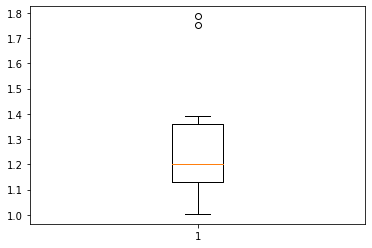

In [83]:
plt.boxplot(df.iloc[:, 3:].quantile(0.75) - df.iloc[:, 3:].quantile(0.25))

### Linearna regresija

In [110]:
X = df.drop(['totlngth', 'site', 'Pop', 'sex'], axis = 1)
y = df.totlngth

In [111]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,0,1,2.203866,0.418967,1.129414,0.443456,-0.515236,1.381091,1.549925,0.146468,0.488855,1.235889
1,0,0,0,1.146010,-0.028792,0.230083,1.023428,-0.260072,0.923835,0.746884,0.908101,0.733282,0.149699
2,0,0,0,1.146010,0.390982,1.000938,1.951384,1.015752,1.586856,0.917226,0.432080,1.466565,0.511762
3,0,0,0,1.146010,0.167102,0.069488,1.139423,0.505422,1.746896,0.990230,0.146468,0.488855,0.511762
4,0,0,0,-0.969701,-0.308642,-0.187464,-0.368506,-0.515236,0.580893,1.233576,0.051264,0.733282,0.149699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,6,1,1,-1.498629,-0.868341,-0.283820,-1.296462,-0.260072,-0.562247,-0.323837,-0.234349,-1.955420,-2.022680
100,6,1,1,-1.498629,-1.120205,-0.701367,-1.064473,1.015752,-0.928052,-0.031822,-0.995982,-0.977710,0.149699
101,6,1,0,1.146010,-0.056777,-0.605010,0.443456,0.505422,-1.133817,-0.664521,-1.948024,-0.977710,-0.936490
102,6,1,1,0.088155,-0.308642,-0.540772,-1.064473,-0.260072,-1.270994,-0.542848,0.336876,-0.977710,-1.298554


In [112]:
X

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
0,2.203866,0.418967,1.129414,-0.515236,1.381091,1.549925,0.146468,0.488855,1.235889
1,1.146010,-0.028792,0.230083,-0.260072,0.923835,0.746884,0.908101,0.733282,0.149699
2,1.146010,0.390982,1.000938,1.015752,1.586856,0.917226,0.432080,1.466565,0.511762
3,1.146010,0.167102,0.069488,0.505422,1.746896,0.990230,0.146468,0.488855,0.511762
4,-0.969701,-0.308642,-0.187464,-0.515236,0.580893,1.233576,0.051264,0.733282,0.149699
...,...,...,...,...,...,...,...,...,...
99,-1.498629,-0.868341,-0.283820,-0.260072,-0.562247,-0.323837,-0.234349,-1.955420,-2.022680
100,-1.498629,-1.120205,-0.701367,1.015752,-0.928052,-0.031822,-0.995982,-0.977710,0.149699
101,1.146010,-0.056777,-0.605010,0.505422,-1.133817,-0.664521,-1.948024,-0.977710,-0.936490
102,0.088155,-0.308642,-0.540772,-0.260072,-1.270994,-0.542848,0.336876,-0.977710,-1.298554


In [113]:
y

0      0.443456
1      1.023428
2      1.951384
3      1.139423
4     -0.368506
         ...   
99    -1.296462
100   -1.064473
101    0.443456
102   -1.064473
103    0.443456
Name: totlngth, Length: 104, dtype: float64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X_test)

In [121]:
mean_squared_error(y_test, y_pred)

0.2981369388673156

In [118]:
reg.score(X, y)

0.7311678060833428